In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import CSS4_COLORS
import ast
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Load CSV or data
data = pd.read_csv(r"C:\Users\bargotah\Downloads\output_nov27\FE_Color.csv")

# Check for missing values
print(data.isnull().sum())

# Inspect data types
print(data.info())

Seed No. per image            0
Class                         0
Area-SAM(mm2)                 0
Length-SAM(mm)                0
Width-SAM(mm)                 0
Perimeter-SAM(mm)             0
Area-SAM_taubin(mm2)          0
Length-SAM_taubin(mm)         0
Width-SAM_taubin(mm)          0
Perimeter-SAM_taubin(mm)      0
Area-SAM_minEnc(mm2)          0
Length-SAM_minEnc(mm)         0
Width-SAM_minEnc(mm)          0
Perimeter-SAM_minEnc(mm)      0
centroid-0                    0
centroid-1                    0
bbox-0                        0
bbox-1                        0
bbox-2                        0
bbox-3                        0
Area-SAM(pix)                 0
Eccentricity                  0
Equivalent diameter area      0
Perimeter(pix)                0
solidity                      0
area_convex                   0
extent                        0
Axis Major Length-SAM(pix)    0
Axis Minor Length-SAM(pix)    0
Aspect Ratio                  0
Roundness                     0
Compactn

In [3]:
selected_columns = ["Class", "RGB value of Seed", "color_seeds"]
df_subset = data[selected_columns]


In [4]:
#function for determining the colo of bars in graph
def get_color(name):
    return CSS4_COLORS.get(name.lower(), '#333333')  # fallback to dark gray if name not found

bar_colors = [get_color(c) for c in df_subset['color_seeds']]

# Count of each color class
counts = df_subset['color_seeds'].value_counts()

In [5]:
counts

color_seeds
gold              1412
yellow             911
orange             619
black              413
goldenrod          263
darkorange         250
chocolate           71
yellowgreen         54
dimgray             43
darkgoldenrod       38
peru                33
darkslategray       31
olive               18
orangered           17
saddlebrown         16
darkturquoise       13
sienna               7
aqua                 6
rosybrown            5
greenyellow          3
firebrick            3
darksalmon           1
indianred            1
palevioletred        1
darkolivegreen       1
maroon               1
darkred              1
tan                  1
Name: count, dtype: int64

In [6]:
counts.info()

<class 'pandas.core.series.Series'>
Index: 28 entries, gold to tan
Series name: count
Non-Null Count  Dtype
--------------  -----
28 non-null     int64
dtypes: int64(1)
memory usage: 1.5+ KB


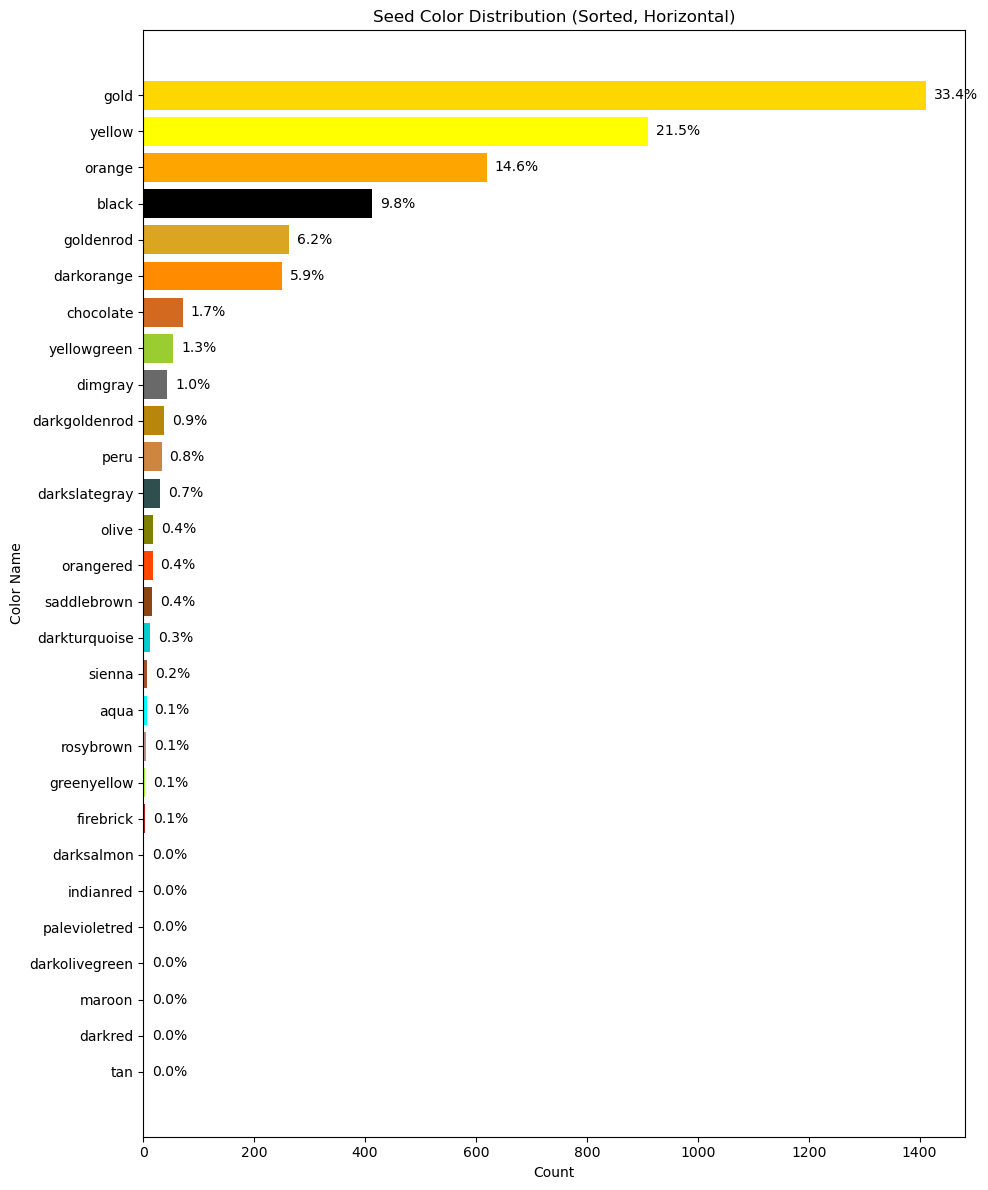

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import CSS4_COLORS

# Function to convert color name → HEX (with fallback)
def get_color(name):
    return CSS4_COLORS.get(name.lower(), '#333333')

# --- Sort counts in descending order ---
counts_sorted = counts.sort_values(ascending=False)

# Extract bar colors after sorting
bar_colors = [get_color(c) for c in counts_sorted.index]

# Total seeds (for % calculation)
total = counts_sorted.sum()

# --- Plot ---
plt.figure(figsize=(10, 12))
# plt.gca().set_facecolor("lightgrey")  # background color

plt.barh(counts_sorted.index, counts_sorted.values, color=bar_colors)

plt.ylabel("Color Name")
plt.xlabel("Count")
plt.title("Seed Color Distribution (Sorted, Horizontal)")

# Add % labels
for i, (count, color_name) in enumerate(zip(counts_sorted.values, counts_sorted.index)):
    pct = (count / total) * 100
    plt.text(count + max(counts_sorted.values) * 0.01,
             i,
             f"{pct:.1f}%",
             va='center')

plt.gca().invert_yaxis()   # largest at top
plt.tight_layout()
plt.show()


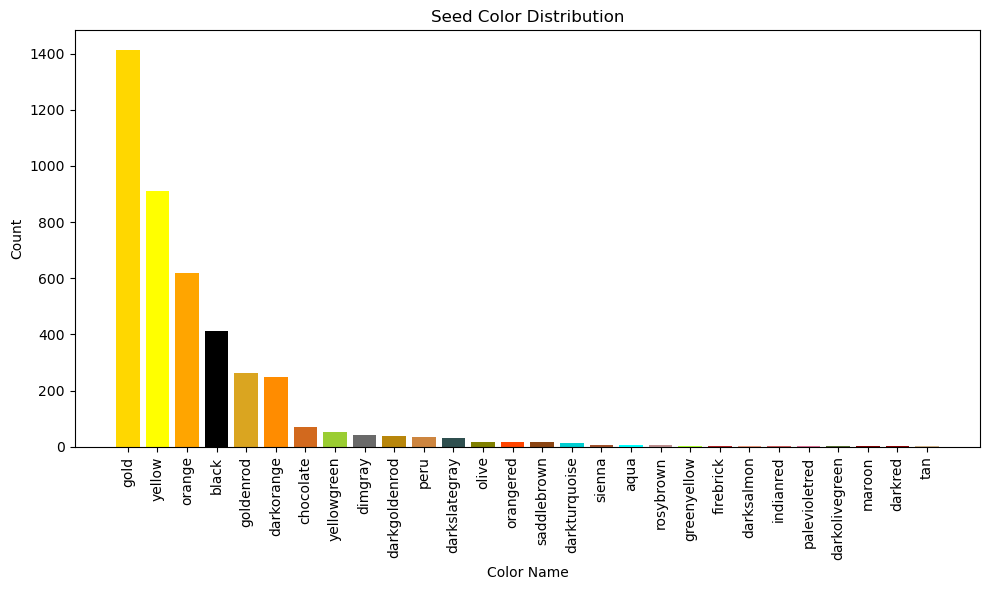

In [8]:
# Function to convert color name → HEX (with fallback)
def get_color(name):
    return CSS4_COLORS.get(name.lower(), '#333333')

# Extract bar colors by mapping index names (color names)
bar_colors = [get_color(c) for c in counts.index]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values, color=bar_colors)
plt.xlabel("Color Name")
plt.ylabel("Count")
plt.title("Seed Color Distribution")
plt.xticks(rotation=90)
plt.tight_layout()

# Save the figure as JPG
plt.savefig("seed_color_distribution.jpg", format='jpg', dpi=300)

# Display the plot
plt.show()


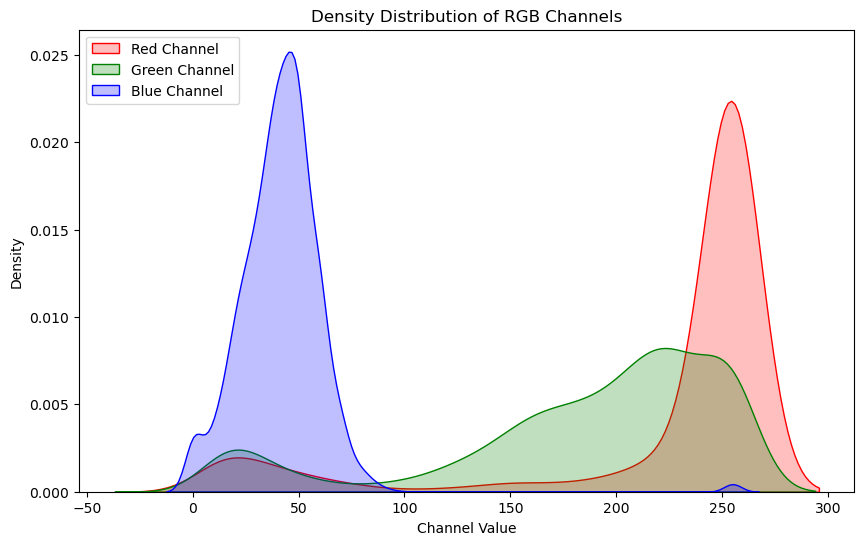

In [9]:
# Step 1: Convert the string '[R, G, B]' into a list
df_subset['RGB_list'] = df_subset['RGB value of Seed'].apply(ast.literal_eval)

# Step 2: Split into R, G, B columns
df_subset[['R', 'G', 'B']] = pd.DataFrame(df_subset['RGB_list'].tolist())

# Step 3: Plot density for each channel
plt.figure(figsize=(10, 6))
sns.kdeplot(df_subset['R'], color='red', label='Red Channel', fill=True)
sns.kdeplot(df_subset['G'], color='green', label='Green Channel', fill=True)
sns.kdeplot(df_subset['B'], color='blue', label='Blue Channel', fill=True)

plt.title('Density Distribution of RGB Channels')
plt.xlabel('Channel Value')
plt.ylabel('Density')
plt.legend()
# Save figure as JPG
plt.savefig("DD_rgb.jpg", format='jpg')
plt.show()


In [10]:
df_subset

,Class,RGB value of Seed,color_seeds,RGB_list,R,G,B
0,Faba-Seed-CC_Vf447-1-1,"[255, 247, 48]",yellow,"[255, 247, 48]",255,247,48
1,Faba-Seed-CC_Vf447-1-1,"[247, 239, 40]",yellow,"[247, 239, 40]",247,239,40
2,Faba-Seed-CC_Vf447-1-1,"[255, 255, 41]",yellow,"[255, 255, 41]",255,255,41
3,Faba-Seed-CC_Vf447-1-1,"[243, 231, 33]",gold,"[243, 231, 33]",243,231,33
4,Faba-Seed-CC_Vf447-1-1,"[255, 242, 39]",yellow,"[255, 242, 39]",255,242,39
...,...,...,...,...,...,...,...
4228,Faba-Seed-CC_Vf299-3-1,"[255, 255, 63]",yellow,"[255, 255, 63]",255,255,63
4229,Faba-Seed-CC_Vf299-3-1,"[255, 254, 55]",yellow,"[255, 254, 55]",255,254,55
4230,Faba-Seed-CC_Vf299-3-1,"[255, 255, 63]",yellow,"[255, 255, 63]",255,255,63
4231,Faba-Seed-CC_Vf299-3-1,"[255, 242, 49]",yellow,"[255, 242, 49]",255,242,49


In [11]:
df_subset.columns


Index(['Class', 'RGB value of Seed', 'color_seeds', 'RGB_list', 'R', 'G', 'B'], dtype='object')

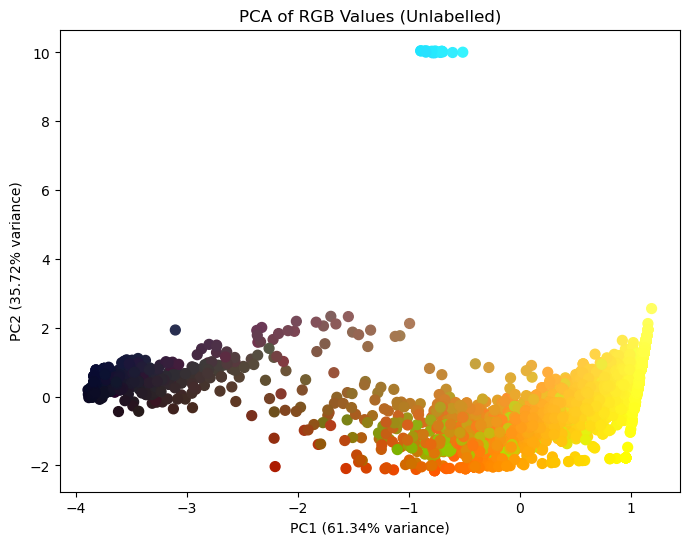

In [12]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df has columns 'R', 'G', 'B'
X = df_subset[['R', 'G', 'B']].values

# Standardize the RGB values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create DataFrame for PCA results
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

# Plot PCA results
plt.figure(figsize=(8,6))
plt.scatter(
    pca_df['PC1'], 
    pca_df['PC2'], 
    c=df_subset[['R', 'G', 'B']].values / 255, 
    s=50
)

plt.title('PCA of RGB Values (Unlabelled)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')

# Remove background grid lines
plt.grid(False)

# Save figure as JPG
plt.savefig("pca_rgb.jpg", format='jpg', dpi=300, bbox_inches='tight')

plt.show()


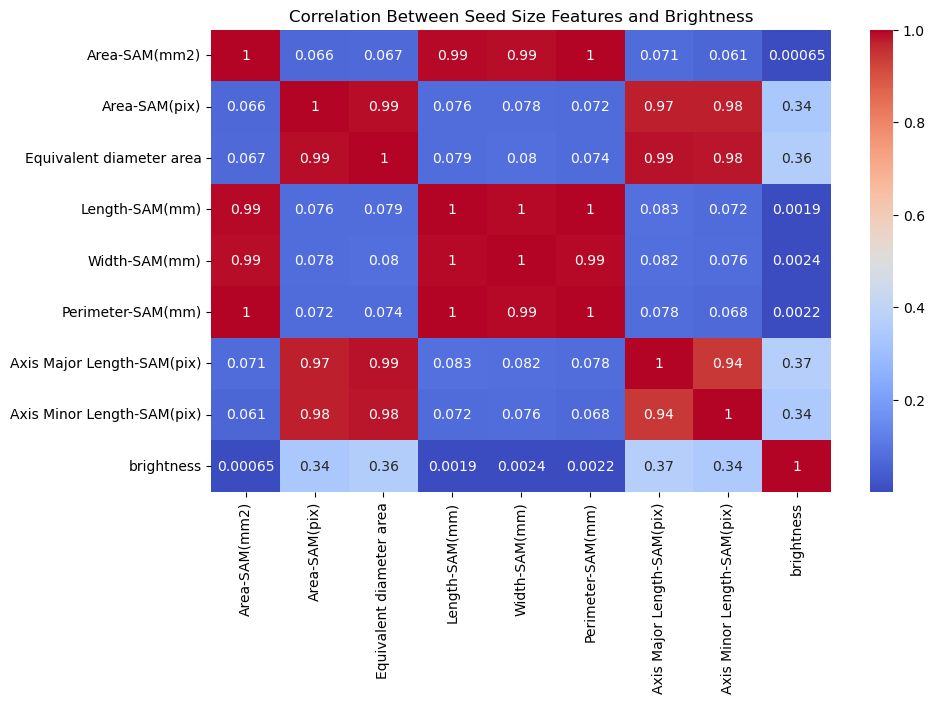


=== REGRESSION RESULTS ===
R² Score: 0.14569681714491078

Feature Importance:
 Axis Major Length-SAM(pix)    0.191123
Width-SAM(mm)                 0.130809
Axis Minor Length-SAM(pix)    0.123109
Equivalent diameter area      0.119297
Length-SAM(mm)                0.116558
Area-SAM(pix)                 0.109550
Area-SAM(mm2)                 0.105575
Perimeter-SAM(mm)             0.103979
dtype: float64


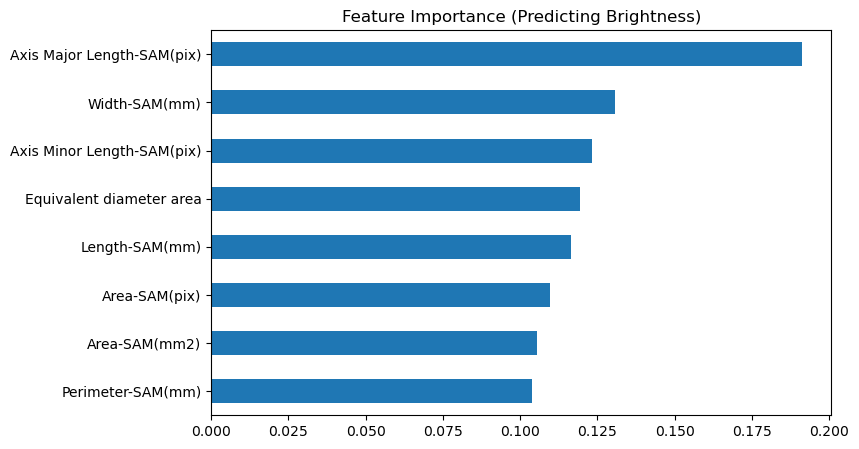


=== CLASSIFICATION RESULTS ===
Accuracy: 0.31759149940968123
Confusion Matrix:
 [[  0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0  27   1   0   0   5   0   1   0   0  30   2   0   0   0  10   0   1
    0   0   0  12   0]
 [  0   7   0   0   0   0   0   0   0   0   5   0   0   0   0   1   0   0
    0   0   0   1   0]
 [  0   1   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   1
    0   0   0   3   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   3   0   0   0   1   0   0   0   0  24   2   0   0   0   5   0   0
    0   0   0   9   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0
    0   0   0   0   0]
 [  0   1   0   0   0   1   0   0   0   0   3   1   0   0   0   0   0   0
    0   0   0   1   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   3 

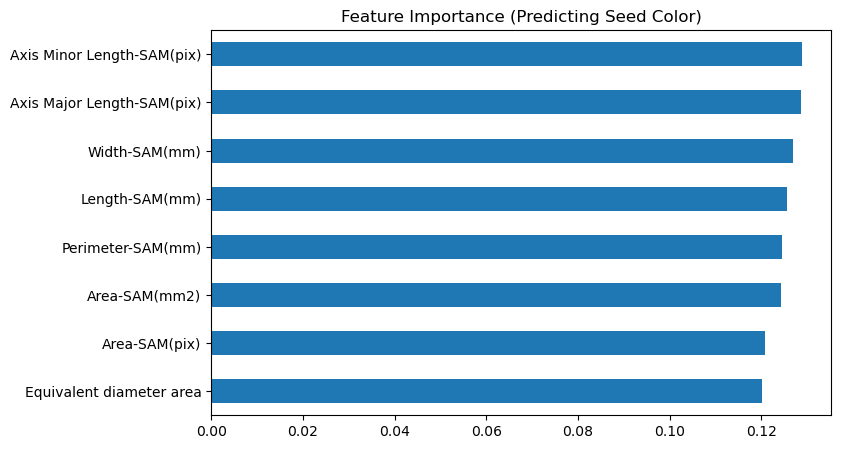

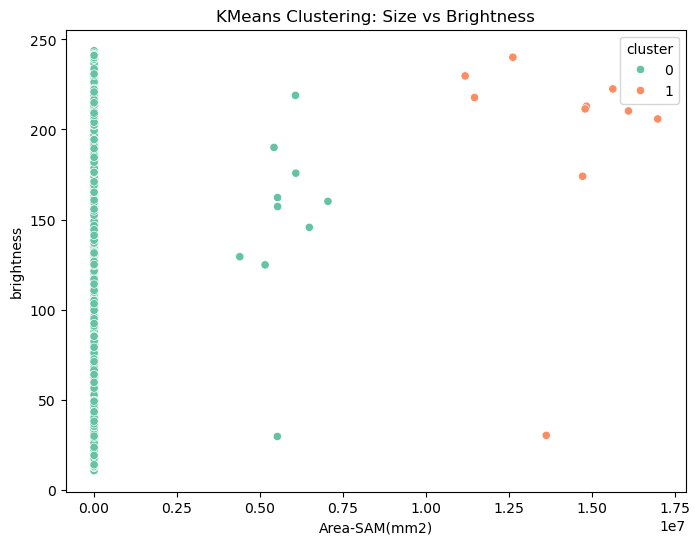


=== CLUSTERING RESULTS ===
cluster
0    181.880989
1    195.486480
Name: brightness, dtype: float64
cluster
0    1.368656e+04
1    1.419589e+07
Name: Area-SAM(mm2), dtype: float64


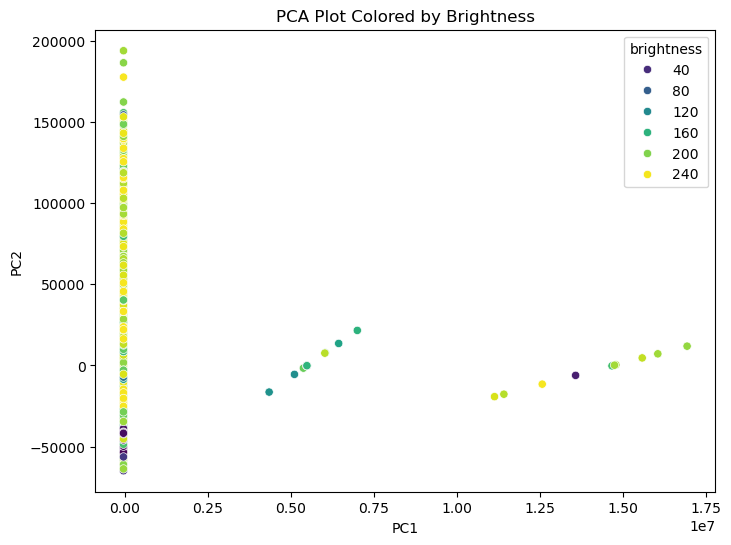


=== PCA EXPLAINED VARIANCE ===
[0.9970821  0.00291788]


In [14]:
# ============================================================
# 1. IMPORTS
# ============================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# ============================================================
# 2. LOAD DATA
# ============================================================
df = data   # replace with your actual df variable

# ============================================================
# 3. COMPUTE BRIGHTNESS FROM RGB
# ============================================================
df['RGB_list'] = df['RGB value of Seed'].apply(lambda x: eval(x) if isinstance(x, str) else x)
df['brightness'] = df['RGB_list'].apply(lambda rgb: 0.2126*rgb[0] + 0.7152*rgb[1] + 0.0722*rgb[2])

# ============================================================
# 4. SELECT SIZE FEATURES
# ============================================================
size_features = [
    "Area-SAM(mm2)", "Area-SAM(pix)", "Equivalent diameter area",
    "Length-SAM(mm)", "Width-SAM(mm)", "Perimeter-SAM(mm)",
    "Axis Major Length-SAM(pix)", "Axis Minor Length-SAM(pix)"
]

X = df[size_features].copy()

# ============================================================
# 5. CORRELATION ANALYSIS
# ============================================================
plt.figure(figsize=(10,6))
sns.heatmap(df[size_features + ['brightness']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Seed Size Features and Brightness")
plt.show()

# ============================================================
# 6. REGRESSION MODEL (Predict brightness from size)
# ============================================================
y_reg = df['brightness']

X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg = RandomForestRegressor()
reg.fit(X_train_scaled, y_train)

y_pred = reg.predict(X_test_scaled)
print("\n=== REGRESSION RESULTS ===")
print("R² Score:", r2_score(y_test, y_pred))

# Feature importance
importances = pd.Series(reg.feature_importances_, index=size_features)
print("\nFeature Importance:\n", importances.sort_values(ascending=False))

plt.figure(figsize=(8,5))
importances.sort_values().plot(kind='barh')
plt.title("Feature Importance (Predicting Brightness)")
plt.show()

# ============================================================
# 7. CLASSIFICATION MODEL (Predict color category)
# ============================================================
le = LabelEncoder()
df['color_label'] = le.fit_transform(df['color_seeds'])

y_clf = df['color_label']

X_train, X_test, y_train, y_test = train_test_split(X, y_clf, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print("\n=== CLASSIFICATION RESULTS ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance
clf_importances = pd.Series(clf.feature_importances_, index=size_features)
plt.figure(figsize=(8,5))
clf_importances.sort_values().plot(kind='barh')
plt.title("Feature Importance (Predicting Seed Color)")
plt.show()

# ============================================================
# 8. CLUSTERING (Unsupervised)
# ============================================================
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Area-SAM(mm2)", y="brightness", hue="cluster", palette="Set2")
plt.title("KMeans Clustering: Size vs Brightness")
plt.show()

print("\n=== CLUSTERING RESULTS ===")
print(df.groupby('cluster')['brightness'].mean())
print(df.groupby('cluster')["Area-SAM(mm2)"].mean())

# ============================================================
# 9. PCA (Optional)
# ============================================================
pca = PCA(n_components=2)
pca_vals = pca.fit_transform(X)

df['PC1'] = pca_vals[:,0]
df['PC2'] = pca_vals[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="brightness", palette="viridis")
plt.title("PCA Plot Colored by Brightness")
plt.show()

print("\n=== PCA EXPLAINED VARIANCE ===")
print(pca.explained_variance_ratio_)


In [ ]:
# ============================================================
# 1. IMPORTS
# ============================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# ============================================================
# 2. LOAD DATA
# ============================================================
df = data   # replace with your actual df variable

# ============================================================
# 3. COMPUTE BRIGHTNESS FROM RGB
# ============================================================
df['RGB_list'] = df['RGB value of Seed'].apply(lambda x: eval(x) if isinstance(x, str) else x)
df['brightness'] = df['RGB_list'].apply(lambda rgb: 0.2126*rgb[0] + 0.7152*rgb[1] + 0.0722*rgb[2])

# ============================================================
# 4. SELECT SIZE FEATURES
# ============================================================
size_features = [
    "Area-SAM(mm2)", "Area-SAM(pix)", "Equivalent diameter area",
    "Length-SAM(mm)", "Width-SAM(mm)", "Perimeter-SAM(mm)",
    "Axis Major Length-SAM(pix)", "Axis Minor Length-SAM(pix)"
]

X = df[size_features].copy()

# ============================================================
# 5. CORRELATION ANALYSIS
# ============================================================
plt.figure(figsize=(10,6))
sns.heatmap(df[size_features + ['brightness']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Seed Size Features and Brightness")
plt.show()

# ============================================================
# 6. REGRESSION MODEL (Predict brightness from size)
# ============================================================
y_reg = df['brightness']

X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg = RandomForestRegressor()
reg.fit(X_train_scaled, y_train)

y_pred = reg.predict(X_test_scaled)
print("\n=== REGRESSION RESULTS ===")
print("R² Score:", r2_score(y_test, y_pred))

# Feature importance
importances = pd.Series(reg.feature_importances_, index=size_features)
print("\nFeature Importance:\n", importances.sort_values(ascending=False))

plt.figure(figsize=(8,5))
importances.sort_values().plot(kind='barh')
plt.title("Feature Importance (Predicting Brightness)")
plt.show()

# ============================================================
# 7. CLASSIFICATION MODEL (Predict color category)
# ============================================================
le = LabelEncoder()
df['color_label'] = le.fit_transform(df['color_seeds'])

y_clf = df['color_label']

X_train, X_test, y_train, y_test = train_test_split(X, y_clf, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print("\n=== CLASSIFICATION RESULTS ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance
clf_importances = pd.Series(clf.feature_importances_, index=size_features)
plt.figure(figsize=(8,5))
clf_importances.sort_values().plot(kind='barh')
plt.title("Feature Importance (Predicting Seed Color)")
plt.show()

# ============================================================
# 8. CLUSTERING (Unsupervised)
# ============================================================
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Area-SAM(mm2)", y="brightness", hue="cluster", palette="Set2")
plt.title("KMeans Clustering: Size vs Brightness")
plt.show()

print("\n=== CLUSTERING RESULTS ===")
print(df.groupby('cluster')['brightness'].mean())
print(df.groupby('cluster')["Area-SAM(mm2)"].mean())

# ============================================================
# 9. PCA (Optional)
# ============================================================
pca = PCA(n_components=2)
pca_vals = pca.fit_transform(X)

df['PC1'] = pca_vals[:,0]
df['PC2'] = pca_vals[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="brightness", palette="viridis")
plt.title("PCA Plot Colored by Brightness")
plt.show()

print("\n=== PCA EXPLAINED VARIANCE ===")
print(pca.explained_variance_ratio_)


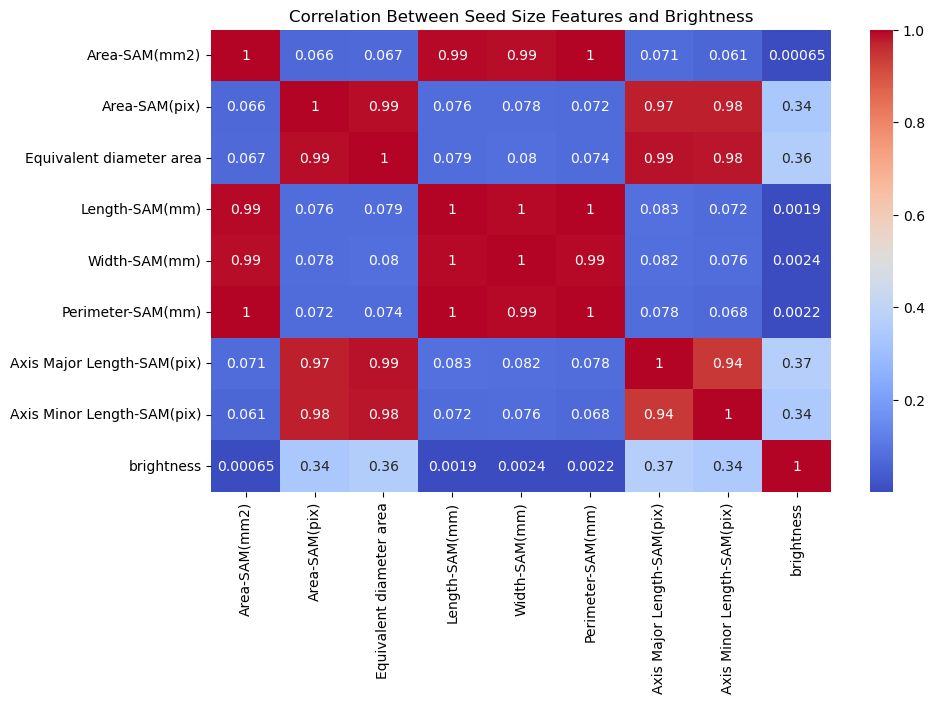


================ REGRESSION RESULTS ================

Linear Regression: R² = 0.1555, MSE = 3477.9190
Random Forest Regressor: R² = 0.1298, MSE = 3583.7215
Gradient Boosting Regressor: R² = 0.1711, MSE = 3413.8260
Support Vector Regressor: R² = 0.0578, MSE = 3880.4695
KNN Regressor: R² = 0.0212, MSE = 4031.0343
Neural Network Regressor: R² = 0.1637, MSE = 3444.1164


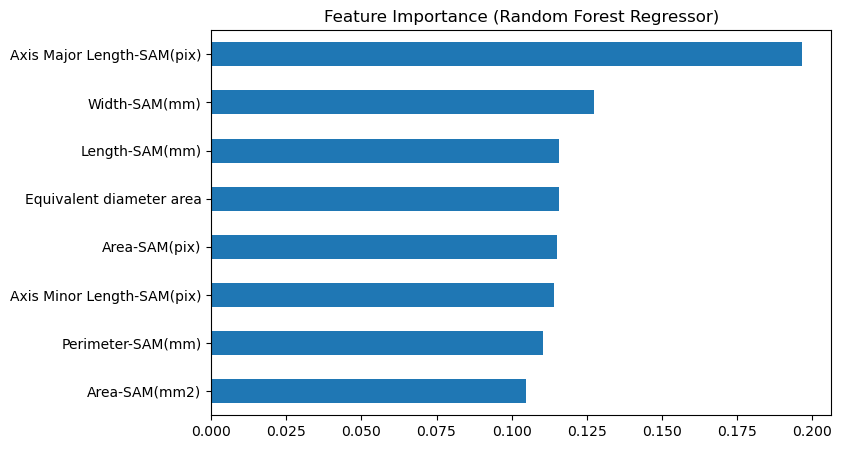


================ CLASSIFICATION RESULTS ================

Logistic Regression: Accuracy = 0.3613
Random Forest Classifier: Accuracy = 0.3188
Gradient Boosting Classifier: Accuracy = 0.3164
Support Vector Classifier: Accuracy = 0.3613
KNN Classifier: Accuracy = 0.2845
Neural Network Classifier: Accuracy = 0.3731

Best Classifier: Neural Network Classifier
[[  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0  36   0   0   0   0   0   0   0  52   0   0   0   0   0   0   0   0
    0   0   1   0]
 [  0   5   0   0   1   0   0   0   0   7   0   0   0   0   0   0   0   0
    0   0   1   0]
 [  0   4   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   5   0   0   0   0   0   0   0  38   0   0   0   0   0   0   0   0
    0   0   1   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   3   0   0   0   0   0   0   0   3   0   0   0   0   0   0   0   0
    0   0 

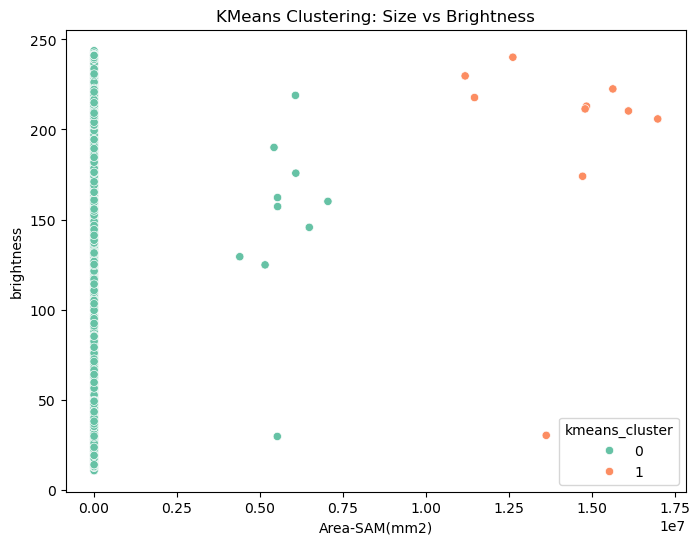

                brightness  Area-SAM(mm2)
kmeans_cluster                           
0               181.880989   1.368656e+04
1               195.486480   1.419589e+07


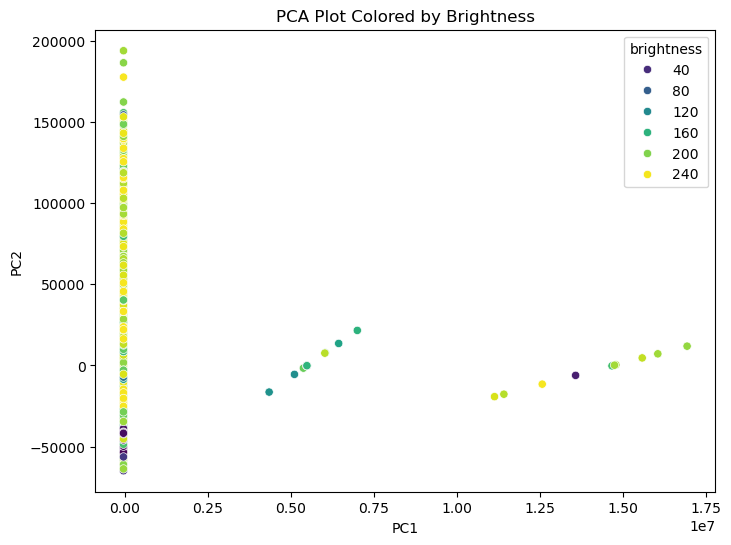


PCA Explained Variance: [0.9970821  0.00291788]


In [15]:
# ============================================================
# 1. IMPORTS
# ============================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    r2_score, mean_squared_error, accuracy_score,
    confusion_matrix, classification_report
)

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Unsupervised models
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# ============================================================
# 2. LOAD DATA
# ============================================================
df = data   # replace with your actual dataframe variable

# ============================================================
# 3. COMPUTE BRIGHTNESS FROM RGB
# ============================================================
df['RGB_list'] = df['RGB value of Seed'].apply(lambda x: eval(x) if isinstance(x, str) else x)
df['brightness'] = df['RGB_list'].apply(lambda rgb: 0.2126*rgb[0] + 0.7152*rgb[1] + 0.0722*rgb[2])

# ============================================================
# 4. SELECT SIZE FEATURES
# ============================================================
size_features = [
    "Area-SAM(mm2)", "Area-SAM(pix)", "Equivalent diameter area",
    "Length-SAM(mm)", "Width-SAM(mm)", "Perimeter-SAM(mm)",
    "Axis Major Length-SAM(pix)", "Axis Minor Length-SAM(pix)"
]

X = df[size_features].copy()

# ============================================================
# 5. CORRELATION ANALYSIS
# ============================================================
plt.figure(figsize=(10,6))
sns.heatmap(df[size_features + ['brightness']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Seed Size Features and Brightness")
plt.show()

# ============================================================
# 6. REGRESSION MODELS (Predict brightness)
# ============================================================
y_reg = df['brightness']

X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

regressors = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "KNN Regressor": KNeighborsRegressor(),
    "Neural Network Regressor": MLPRegressor(max_iter=2000)
}

reg_results = {}

print("\n================ REGRESSION RESULTS ================\n")

for name, model in regressors.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    reg_results[name] = r2
    print(f"{name}: R² = {r2:.4f}, MSE = {mse:.4f}")

# Feature importance for tree models
rf = regressors["Random Forest Regressor"]
importances = pd.Series(rf.feature_importances_, index=size_features)
plt.figure(figsize=(8,5))
importances.sort_values().plot(kind='barh')
plt.title("Feature Importance (Random Forest Regressor)")
plt.show()

# ============================================================
# 7. CLASSIFICATION MODELS (Predict color category)
# ============================================================
le = LabelEncoder()
df['color_label'] = le.fit_transform(df['color_seeds'])

y_clf = df['color_label']

X_train, X_test, y_train, y_test = train_test_split(X, y_clf, test_size=0.2, random_state=42)

classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Support Vector Classifier": SVC(),
    "KNN Classifier": KNeighborsClassifier(),
    "Neural Network Classifier": MLPClassifier(max_iter=2000)
}

clf_results = {}

print("\n================ CLASSIFICATION RESULTS ================\n")

for name, model in classifiers.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    clf_results[name] = acc
    print(f"{name}: Accuracy = {acc:.4f}")

# Confusion matrix for best classifier
best_clf_name = max(clf_results, key=clf_results.get)
best_clf = classifiers[best_clf_name]

print(f"\nBest Classifier: {best_clf_name}")
print(confusion_matrix(y_test, best_clf.predict(X_test_scaled)))

# ============================================================
# 8. UNSUPERVISED CLUSTERING
# ============================================================
print("\n================ CLUSTERING RESULTS ================\n")

# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X)

# Gaussian Mixture
gmm = GaussianMixture(n_components=2, random_state=42)
df['gmm_cluster'] = gmm.fit_predict(X)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(X)

# Plot KMeans clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Area-SAM(mm2)", y="brightness", hue="kmeans_cluster", palette="Set2")
plt.title("KMeans Clustering: Size vs Brightness")
plt.show()

print(df.groupby('kmeans_cluster')[['brightness', 'Area-SAM(mm2)']].mean())

# ============================================================
# 9. PCA ANALYSIS
# ============================================================
pca = PCA(n_components=2)
pca_vals = pca.fit_transform(X)

df['PC1'] = pca_vals[:,0]
df['PC2'] = pca_vals[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="brightness", palette="viridis")
plt.title("PCA Plot Colored by Brightness")
plt.show()

print("\nPCA Explained Variance:", pca.explained_variance_ratio_)


In [16]:
# ============================================================
# 10. AUTOMATIC MODEL SELECTION
# ============================================================

# Best regression model (by R²)
best_reg_name = max(reg_results, key=reg_results.get)
best_reg_r2 = reg_results[best_reg_name]

# Best classification model (by Accuracy)
best_clf_name = max(clf_results, key=clf_results.get)
best_clf_acc = clf_results[best_clf_name]

print("\n================ BEST MODELS ================\n")
print(f"Best regression model: {best_reg_name} (R² = {best_reg_r2:.4f})")
print(f"Best classification model: {best_clf_name} (Accuracy = {best_clf_acc:.4f})")



================ BEST MODELS ================

Best regression model: Gradient Boosting Regressor (R² = 0.1711)
Best classification model: Neural Network Classifier (Accuracy = 0.3731)
